<a href="https://colab.research.google.com/github/chasebw/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

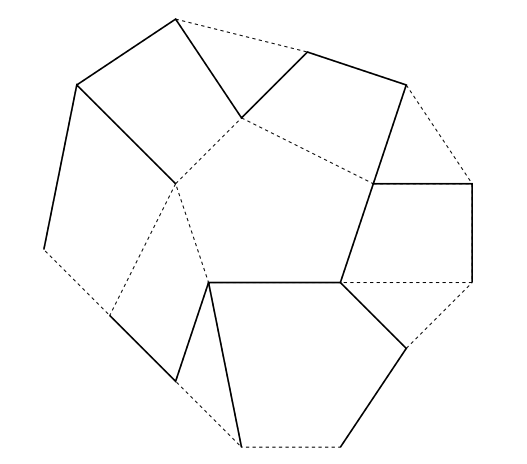

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

Takes in a graph and returns nodes
- points x,y
Takes a graph and returns indexes
- index connected to other indexes in a tuple
Adjacency
- within a certain range of x,y are adjacent? check for proximity?

Graph representation
- nodes list, and links list 


In [ ]:
import random as rn
import matplotlib.pyplot as plt
from math import sqrt, ceil
from functools import cache

################################################################
# GENERATE_RANDOM_POINTS:
# Generates a number of random points for a graph
################################################################
def generate_random_points(num_points):
    return [*map(lambda _: [rn.randint(-15,15), rn.randint(-15,15)], range(num_points))]

################################################################
# GET_ADJACENT_NODES:
# Finds nodes that are adjacent to itself
# Adjacent nodes fall within a RANGE of x and y 
################################################################
def get_adjacent_nodes(node,points,myrange):
    points = points.copy()
    points.remove(node)
    adj_points = [] # The points that are adjacent
    adjacent = {}
    for point in points:
        distance = sqrt( ((point[0] - node[0])**2) + ((point[1] - node[1])**2) )
        if (distance < myrange):
            adj_points.append(point)
    adjacent[tuple(node)] = adj_points
    return adjacent

################################################################
# GET_ALL_ADJACENTS_DICT:
# Finds nodes that are adjacent to each node
# Adjacent nodes fall within a RANGE of x and y
# They are stored in a dictionary 
################################################################
def get_all_adjacents_dict(points,myrange):
    all_dict = {}
    for point in points:
        single_dict = get_adjacent_nodes(point,points,myrange)
        all_dict.update(single_dict)
    return all_dict

################################################################
# GRAPH_POINTS:
# Finds nodes that are adjacent to itself
# Adjacent nodes fall within a RANGE of x and y 
################################################################
def graph_points(points):
    x_values = [x[0] for x in points]
    y_values = [y[1] for y in points]
    # Create Subplots
    fig, ax = plt.subplots()
    # Plot x and y points
    ax.plot(x_values, y_values, 'ro')
    #ax.plot([-6,1],[3,4], linestyle='dashed') # Draw a Line
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.show()

################################################################
# GENERATE LINKS:
# Finds links to form a spanning tree
################################################################
def generate_links(points,myrange):
    connected = []
    num_points = len(points)
    points = points.copy()
    first_point = list(points.keys())[0] # grab first point from dict 
    connected.append(list(first_point))
    links_x = []
    links_y = []
    while len(connected) < num_points:
        for point in connected:
            adj_points = points.get(tuple(point))
            rn.shuffle(adj_points)
            if(len(adj_points)):
                adj = adj_points[0]
                if (adj not in connected):
                    connected.append(adj)
                    links_x.append([adj[0],point[0]])
                    links_y.append([adj[1],point[1]])
                else:
                    adj_points.remove(adj)
                    temp_dict = {tuple(point): adj_points}
                    points.update(temp_dict)
    return links_x, links_y

################################################################
# GRAPH_POINTS_WITH_LINKS:
# This graphs the points with its connecting links
################################################################
def graph_points_with_links(points, links):
    x_values = [x[0] for x in points]
    y_values = [y[1] for y in points]
    # Create Subplots
    fig, ax = plt.subplots()
    # Plot x and y points
    ax.plot(x_values, y_values, 'ro')
    for linkx,linky in zip(links[0],links[1]):
        ax.plot(linkx, linky) 
    plt.show()

In [ ]:
def get_nodes(graph):
    return graph[0]

def get_links(graph):
    return graph[1]

In [ ]:
# Generate points for graph
list1 = [[2,y] for y in range(-5,20,5)]
list2 = [[-3,y] for y in range(-5,20,5)]

myrange = 6
# Generated points
points = list1 + list2

# Call functions
dictionary = get_all_adjacents_dict(points, myrange)
links2 = generate_links(dictionary,myrange)
#graph_points_with_links(points, links2)
graph = (points, links2)
print("Graph Links")
print(get_links(graph))
print("\n")

print("Graph Nodes")
print(get_nodes(graph))
print("\n")

print("Adjacency List/Dictionary: ")
print(dictionary)

Graph Links
([[-3, 2], [-3, -3], [2, -3], [2, 2], [-3, 2], [-3, -3], [-3, -3], [2, -3], [2, -3]], [[-5, -5], [0, -5], [0, 0], [5, 0], [5, 5], [10, 5], [15, 10], [15, 15], [10, 10]])


Graph Nodes
[[2, -5], [2, 0], [2, 5], [2, 10], [2, 15], [-3, -5], [-3, 0], [-3, 5], [-3, 10], [-3, 15]]


Adjacency List/Dictionary: 
{(2, -5): [], (2, 0): [[2, 5]], (2, 5): [[2, 10]], (2, 10): [[2, 15], [-3, 10]], (2, 15): [], (-3, -5): [], (-3, 0): [[-3, -5]], (-3, 5): [[-3, 10]], (-3, 10): [[2, 10], [-3, 15]], (-3, 15): [[-3, 10]]}


## Test Your Code

# 5 Rung Ladder Graph

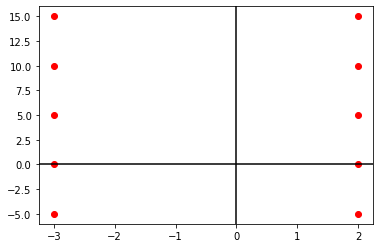

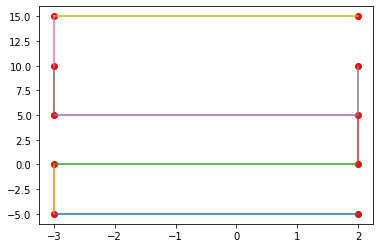

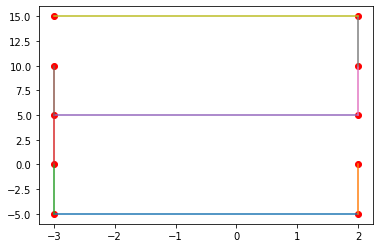

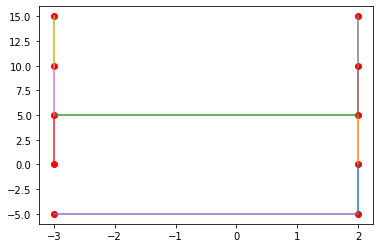

In [ ]:
# Generate points for graph
list1 = [[2,y] for y in range(-5,20,5)]
list2 = [[-3,y] for y in range(-5,20,5)]

myrange = 6
# Generated points
points = list1 + list2

# # Call functions
graph_points(points)
for x in range(3):
    dictionary = get_all_adjacents_dict(points, myrange)
    links2 = generate_links(dictionary,myrange)
    graph_points_with_links(points, links2)

# Ladder Graph 4 Rung - Spanning Trees

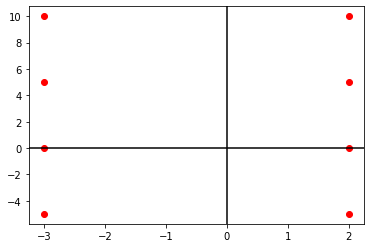

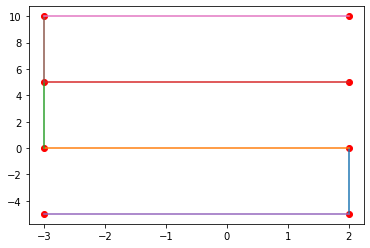

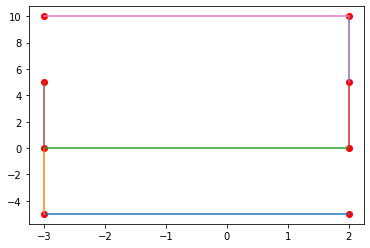

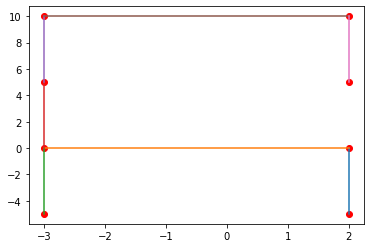

In [ ]:
# Generate points for graph
list1 = [[2,y] for y in range(-5,15,5)]
list2 = [[-3,y] for y in range(-5,15,5)]

myrange = 6
# Generated points
points = list1 + list2

# # Call functions
graph_points(points)
for x in range(3):
    dictionary = get_all_adjacents_dict(points, myrange)
    links2 = generate_links(dictionary,myrange)
    graph_points_with_links(points, links2)

# Wheel Graph - Spanning Trees

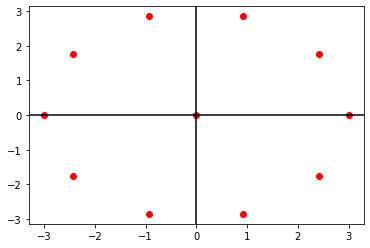

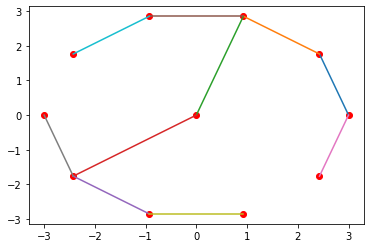

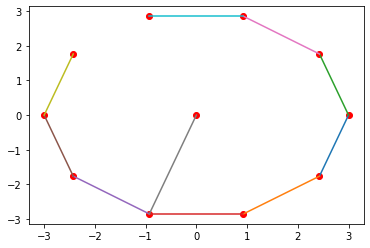

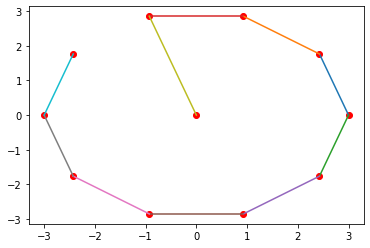

In [ ]:
from math import pi, cos, sin

radius = 3
angles = []
for x in range(10):
    angles.append ( ((x *.1) * pi * 2))

myrange2 = 3

x_points = [*map(lambda x: cos(x) * radius, angles)]
y_points = [*map(lambda x: sin(x) * radius, angles)]
points2 = [[x,y] for x,y in zip(x_points, y_points)]

# Add Center
points2.append([0,0])

graph_points(points2)
for _ in range(3):
    dictionary = get_all_adjacents_dict(points2, myrange2)
    links3 = generate_links(dictionary, myrange2)
    graph_points_with_links(points2, links3)

# Length 3 Ladder Graph

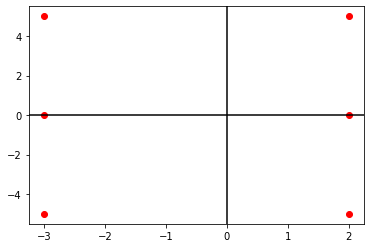

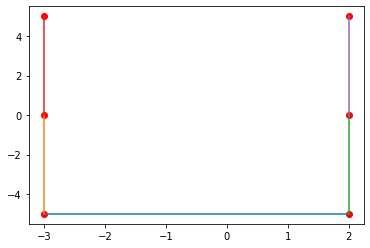

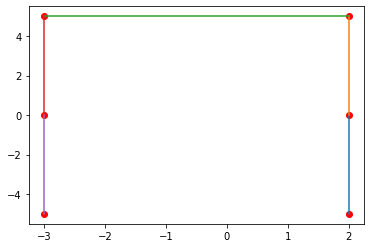

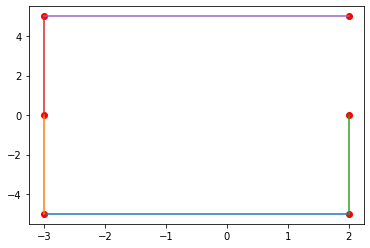

In [ ]:
# Generate points for graph
list1 = [[2,y] for y in range(-5,10,5)]
list2 = [[-3,y] for y in range(-5,10,5)]

myrange = 6
# Generated points
points = list1 + list2

# # Call functions
graph_points(points)
for x in range(3):
    dictionary = get_all_adjacents_dict(points, myrange)
    links2 = generate_links(dictionary,myrange)
    graph_points_with_links(points, links2)

# Length 2 Ladder Graph

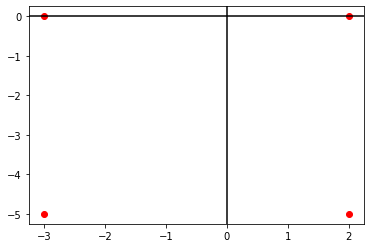

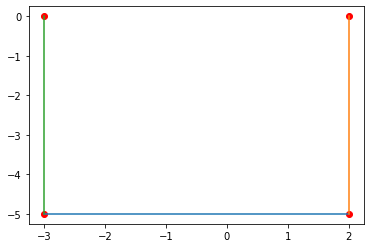

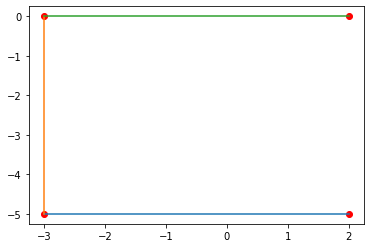

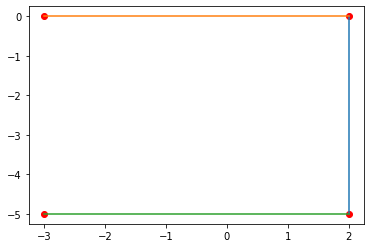

In [ ]:
# Generate points for graph
list1 = [[2,y] for y in range(-5,5,5)]
list2 = [[-3,y] for y in range(-5,5,5)]

# Generated points
points = list1 + list2
# Adjacent nodes are those that are within 6 units
myrange = 6

# Call functions
graph_points(points)
for x in range(3):
    dictionary = get_all_adjacents_dict(points, myrange)
    links2 = generate_links(dictionary,myrange)
    graph_points_with_links(points, links2)

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


### This is the graph from above in the assignment

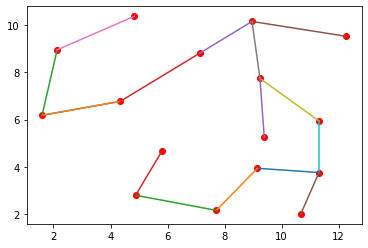

In [ ]:
points3 = [(1.60,6.18), (9.15,3.94), (8.96,10.15), (11.31,3.76), (11.31,5.94), (4.84,10.37), (4.88,2.80), (2.13,8.95), (9.39,5.25), (4.34,6.77), (12.27,9.52), (9.24,7.74), (10.67,2.01), (7.71,2.16), (5.80,4.66), (7.12,8.80)]

myrange3 = 3.5


dictionary2 = get_all_adjacents_dict(points3, myrange3)
links5 = generate_links(dictionary2,myrange3)
graph_points_with_links(points3, links5)

# Graph of own devising with many points/links

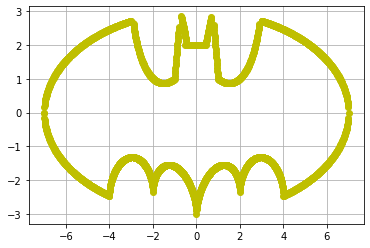

In [ ]:
import math
import numpy as np
Y = np.arange(-4,4,.005)
X = np.zeros((0))
for y in Y:
  X = np.append(X,abs(y/2)- 0.09137*y**2 + math.sqrt(1-(abs(abs(y)-2)-1)**2) -3)
  
Y1 = np.append(np.arange(-7,-3,.01), np.arange(3,7,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 3*math.sqrt(-(y/7)**2+1))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-7.,-4,.01), np.arange(4,7.01,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, -3*math.sqrt(-(y/7)**2+1))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-1,-.8,.01), np.arange(.8, 1,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 9-8*abs(y))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.arange(-.5,.5,.05)
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1,2)
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-2.9,-1,.01), np.arange(1, 2.9,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 1.5 - .5*abs(y) - 1.89736*(math.sqrt(3-y**2+2*abs(y))-2) )
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-.7,-.45,.01), np.arange(.45, .7,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 3*abs(y)+.75)
X = np.append(X,X1)
Y = np.append(Y, Y1)
plt.plot(Y,X, 'yo')
plt.grid()
plt.show()

## Well This try didn't work my range was too large
## But sure looks beautiful


Number of points: 
3491
Number of Links:
3489


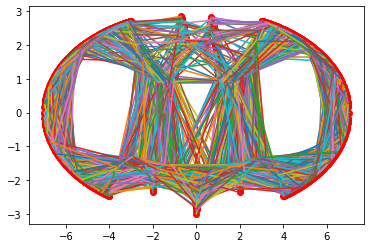

In [ ]:
values = [[y,x] for x,y in zip(X,Y)] # Requires X,Y from original graph
print("Number of points: ")
print(len(values))

myrange3 = 3.5

dictionary2 = get_all_adjacents_dict(values, myrange3)
links5 = generate_links(dictionary2,myrange3)
print("Number of Links:")
print(len(links5[0]))
graph_points_with_links(values, links5)

See the self-assessment for specifics.

## This one looks a little better
#### Ran this through spanning tree algorithm here

Number of points: 
3491
Number of Links:
3489


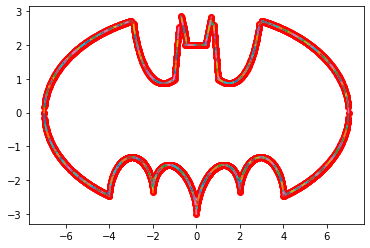

In [ ]:
values = [[y,x] for x,y in zip(X,Y)] # Requires X,Y from original graph
print("Number of points: ")
print(len(values))

myrange3 = 0.200

dictionary2 = get_all_adjacents_dict(values, myrange3)
links5 = generate_links(dictionary2,myrange3)
print("Number of Links:")
print(len(links5[0]))
graph_points_with_links(values, links5)

# TODO My Report on What I Did and What I Learned

## Fun


I spent a lot of time on this. I had fun. I made some cool graphs and it is always more satisfying if you have some visual representations of the work that is done. I spent some time first writing my algorithm then revising it after realizing it was slow. I enjoyed this assignment.

## New

I learned a few things. I investigated using points as keys in a dictionary. I could have used a class but I chose a dictionary. I ran into the issue of not understanding the key in a dictionary needs to be a tuple not a list and there are certain unhashable types like lists. You need to cast your list into a tuple if you plan to use it as a key. Also, I had a bug that took me a while where I didn't realize I was adding a tuple version of a point and a list version, essentially having a copy of it in my dictionary that was causing a problem. I also learned how to improve my algorithm based on some previous experience with another algorithm. I will discuss this below.

## Meaningful


I was able to come up with a significant algorithm that is pretty efficient. I became more confident in forming algorithms and thinking about how to improve the complexity of my algorithm. 

## Other

Connections:
One connection I made was due to how I defined "adjacent" nodes. I defined adjacent nodes as those that fall within a certain distance of the node. In defining this I first considered calculating the distances each time I run into a node to find adjacent nodes for a node. I realized this was grossly inefficient, it reminded me of the KNN or the K Nearest Neighbor Algorithm in which you can initially compute the values of distances and put them in a KD tree. I put the computed distances instead in a dictionary of computed distances and the nodes that fall within the given range. It had a similar principle that I followed 

Collaborators:
I worked with Jack and discussed the problem. He was taking a different approach that gave me an idea so I went back and improved my algorithm. As mentioned we talked about KNN and how I am computing the distances which gave me the idea to improve my algorithm to make it more efficient. Before it took a long time to compute 40 points. Now it can compute 4000 points in not too long.



# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

### TA Comments

While you technically didn't create three larger graphs (you only created one), I'm still going to give you full credit just because it's so awesome! Very well done!